In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as cuts
import numpy as np

Welcome to JupyROOT 6.24/04


In [2]:
# TODO: add to library 
@ROOT.Numba.Declare(['float', 'float', 'float'], 'float')
def get_theta(px, py, pz):
    return np.degrees(np.arctan2(np.sqrt(px**2 + py**2), pz))

@ROOT.Numba.Declare(['float', 'float'], 'float')
def get_phi(px, py):
    return np.degrees(np.arctan2(py, px))


In [3]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [4]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data')

df_pipkmks = df_pipkmks.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS)

df_pipkmks = df_pipkmks.Define('km_theta', 'Numba::get_theta(km_px, km_py, km_pz)')
df_pipkmks = df_pipkmks.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
df_pimkpks = df_pimkpks.Define('kp_theta', 'Numba::get_theta(kp_px, kp_py, kp_pz)')
df_pimkpks = df_pimkpks.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')

In [5]:
headers = df_pipkmks.GetColumnNames()
for header in headers:
    if 'km' in str(header):
        print(header)

km_theta
km_p
mxpx_ppipkmks
mxpy_ppipkmks
mxpz_ppipkmks
mxe_ppipkmks
mx2_ppipkmks
kmp_px
kmp_py
kmp_pz
kmp_E
kmp_m
kmpip_px
kmpip_py
kmpip_pz
kmpip_E
kmpip_m
pipkmks_px
pipkmks_py
pipkmks_pz
pipkmks_E
pipkmks_px_measured
pipkmks_py_measured
pipkmks_pz_measured
pipkmks_pt
pipkmks_p_pt_diff
pipkmks_m
kmks_px
kmks_py
kmks_pz
kmks_E
kmks_m
km_trkid
km_x4_meas
km_p4_meas
km_x4_kin
km_p4_kin
km_pid_fom
km_beta_time
km_chisq_time
km_ndf_time
km_ndf_trk
km_chisq_trk
km_ndf_dedx
km_chisq_dedx
km_dedx_cdc
km_dedx_fdc
km_dedx_tof
km_dedx_st
km_ebcal
km_eprebcal
km_efcal
km_bcal_delphi
km_bcal_delz
km_fcal_doca
km_px
km_py
km_pz
km_E
km_px_measured
km_py_measured
km_pz_measured
km_E_measured


In [18]:
hist_pipkmks_no_momentum_cut = df_pipkmks.Histo1D(('pipkmks_no_p_cut', 'f_{1}(`1285) w/ no p cut for #pi^{+}K^{-}K_{s}', 50, 1.1, 1.6), 'pipkmks_m')
hist_pipkmks_momentum_cut = df_pipkmks.Filter('km_p > 2.0').Histo1D(('pipkmks_p_cut', 'f_{1}(`1285) p(K) > 2.0 for #pi^{+}K^{-}K_{s}', 50, 1.1, 1.6), 'pipkmks_m')
hist_pipkmks_theta_cut = df_pipkmks.Filter('km_theta < 20').Histo1D(('pipkmks_p_cut', 'f_{1}(`1285) p(K) > 2.0 for #pi^{+}K^{-}K_{s}', 50, 1.1, 1.6), 'pipkmks_m')
hist_pimkpks_no_momentum_cut = df_pimkpks.Histo1D(('pimkpks_no_p_cut', 'f_{1}(`1285) w/ no p cut for #pi^{-}K^{+}K_{s}', 50, 1.1, 1.6), 'pimkpks_m')
hist_pimkpks_momentum_cut = df_pimkpks.Filter('kp_p > 2.0').Histo1D(('pimkpks_p_cut', 'f_{1}(`1285) p(K) > 2.0 for #pi^{-}K^{+}K_{s}', 50, 1.1, 1.6), 'pimkpks_m')
hist_pimkpks_theta_cut = df_pimkpks.Filter('kp_theta < 20').Histo1D(('pimkpks_p_cut', 'f_{1}(`1285) p(K) > 2.0 for #pi^{-}K^{+}K_{s}', 50, 1.1, 1.6), 'pimkpks_m')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


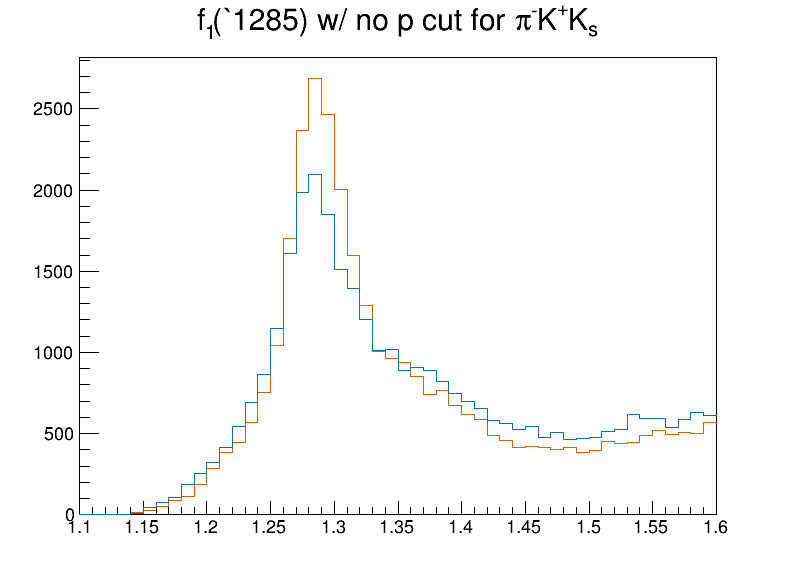

In [19]:
c = ROOT.TCanvas('c', 'c', 800, 600)
hist_pipkmks_no_momentum_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_no_momentum_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_pimkpks_no_momentum_cut.Draw()
hist_pipkmks_no_momentum_cut.Draw('same')
c.Draw()

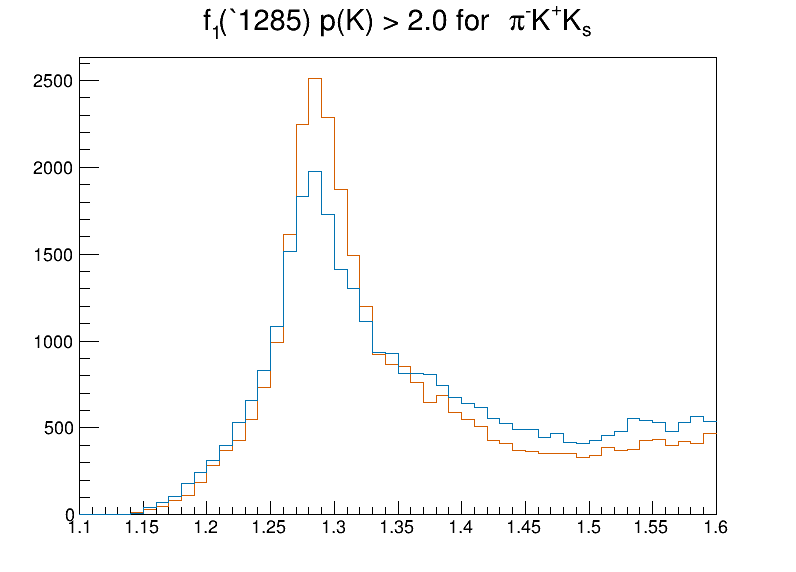

In [20]:
hist_pipkmks_momentum_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_momentum_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_pimkpks_momentum_cut.Draw()
hist_pipkmks_momentum_cut.Draw('same')
c.Draw()

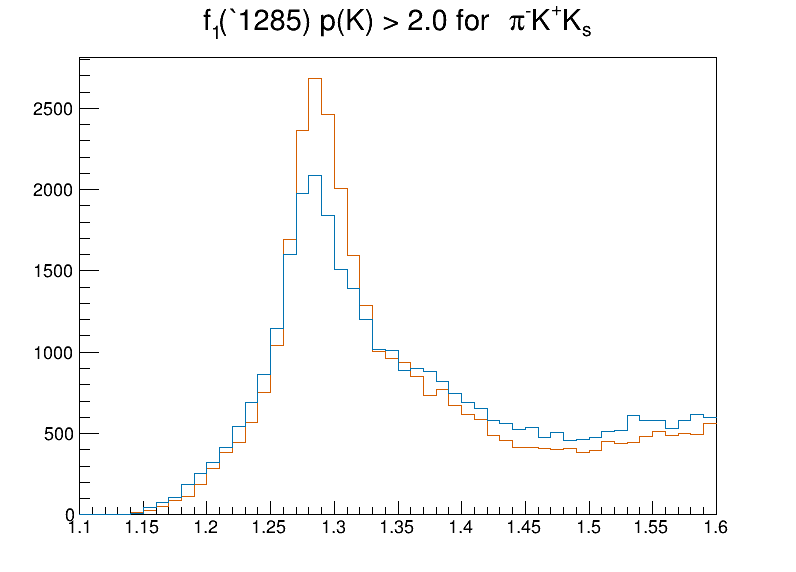

In [21]:
hist_pipkmks_theta_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks_theta_cut.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_pimkpks_theta_cut.Draw()
hist_pipkmks_theta_cut.Draw('same')
c.Draw()